<a id="top"></a>
 <font size="5">Generate data</font>
> 

> * Prepared by Alfredo López
> * alfredo.lopez@scch.at
> 
<hr>
<hr>

# Import

In [1]:
import os
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display

# Folders

In [2]:
# Please enter the input data folder 
data_folder = '../../../2_data/processed/synthetic'

# save the data ?
save_data = False
os.makedirs(data_folder, exist_ok=True)

# Declarations

In [3]:
def solve_sym(ode, ics=None):

    print('Linear-Homogeneous')
    y = sp.Function('y')
    t = sp.Symbol('t')
    hode = sp.Eq(ode.lhs, 0)
    sol = sp.dsolve(hode, y(t), ics=ics)
    display(hode)
    display(sol)

    print('')

    print('Non-homogeneous')
    sol = sp.dsolve(ode, y(t), ics=ics)
    display(ode)
    display(sol)


def solve_num(ode, ics, n_samples, dt=1):

    print('Numerical solution')

    y = sp.Function('y')
    t = sp.Symbol('t')
    sol = sp.dsolve(ode, y(t), ics=ics)
    fun = sp.lambdify(args=[t], expr=sol.rhs)
    t = np.arange(n_samples)*dt

    display(ode)
    display(sol)

    try:
        ft = fun(t)
    except:
        ft = np.nan*np.ones(n_samples)

    ft = fun(t)
    s = pd.Series(ft, index=t, name='y')
    s.index.name = 't'
    
    return s

# Step

Linear-Homogeneous


Eq(Derivative(y(t), t), 0)

Eq(y(t), C1)


Non-homogeneous


Eq(Derivative(y(t), t), 2*DiracDelta(t - t^{\ast}))

Eq(y(t), C1 + 2*Heaviside(t - t^{\ast}))

Numerical solution


Eq(Derivative(y(t), t), 2*DiracDelta(t - 47.5))

Eq(y(t), 2.0*Heaviside(t - 47.5) - 1)

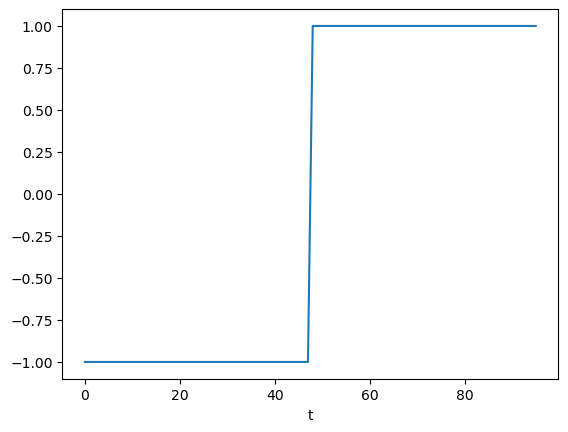

In [4]:
tast = sp.Symbol(r't^{\ast}', positive=True)
t = sp.Symbol('t')
y = sp.Function('y')
lhs = sp.Derivative(y(t), t)
rhs = 2*sp.DiracDelta(t-tast)
ode = sp.Eq(lhs, rhs)
solve_sym(ode)

tast = 47.5
t = sp.Symbol('t')
y = sp.Function('y')
lhs = sp.Derivative(y(t), t)
rhs = 2*sp.DiracDelta(t-tast)
ode = sp.Eq(lhs, rhs)
ics = {y(0): -1} 
n_samples = 96
s = solve_num(ode, ics, n_samples)

s.plot()

if  save_data:
    s.to_csv(os.path.join(data_folder, '1_step.csv'), header=True)
    print('Data saved at %s' % os.path.join(data_folder, '1_step.csv'))

# Ramp

Linear-Homogeneous


Eq(Derivative(y(t), (t, 2)), 0)

Eq(y(t), C1 + C2*t)


Non-homogeneous


Eq(Derivative(y(t), (t, 2)), 2*DiracDelta(t - t^{\ast}))

Eq(y(t), C1 + t*(C2 + 2*Heaviside(t - t^{\ast})) - 2*t^{\ast}*Heaviside(t - t^{\ast}))

Numerical solution


Eq(Derivative(y(t), (t, 2)), 2*DiracDelta(t - 47.5))

Eq(y(t), t*(2*Heaviside(t - 47.5) - 1.0) - 95.0*Heaviside(t - 47.5) + 23.5)

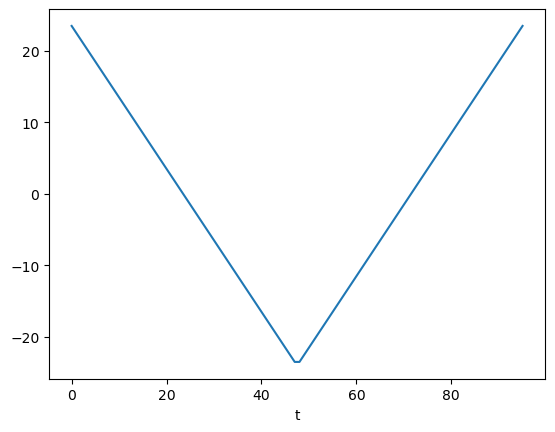

In [5]:
tast = sp.Symbol(r't^{\ast}', positive=True)
t = sp.Symbol('t')
y = sp.Function('y')
lhs = sp.Derivative(y(t), t, t)
rhs = 2*sp.DiracDelta(t-tast)
ode = sp.Eq(lhs, rhs)
solve_sym(ode)

tast = 47.5
t = sp.Symbol('t')
y = sp.Function('y')
lhs = sp.Derivative(y(t), t, t)
rhs = 2*sp.DiracDelta(t-tast)
ode = sp.Eq(lhs, rhs)
ics = {y(0): 23.5, y(t).diff(t).subs(t,0): -1}
n_samples = 96
s = solve_num(ode, ics, n_samples)

s.plot()

if  save_data:
    s.to_csv(os.path.join(data_folder, '2_ramp.csv'), header=True)
    print('Data saved at %s' % os.path.join(data_folder, '2_ramp.csv'))

# SinACP

Linear-Homogeneous


Eq(omega**2*y(t) + Derivative(y(t), (t, 2)), 0)

Eq(y(t), C2*cos(omega*t))


Non-homogeneous


Eq(omega**2*y(t) + Derivative(y(t), (t, 2)), F*DiracDelta(t - t^{\ast}))

Eq(y(t), C2*cos(omega*t) + F*sin(omega*(t - t^{\ast}))*Heaviside(t - t^{\ast})/omega)

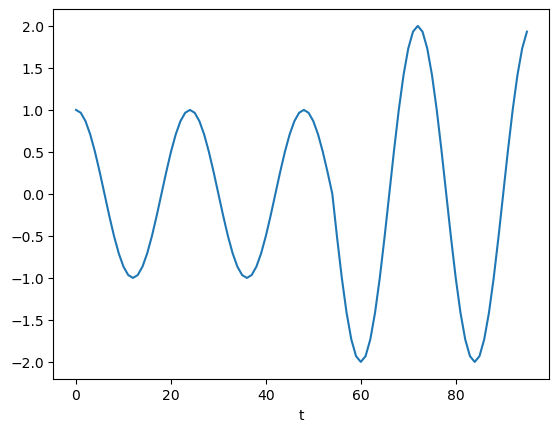

In [6]:
omega = sp.Symbol('omega', positive=True)
k = omega**2
F = sp.Symbol('F', real=True)
tast = sp.Symbol(r't^{\ast}', positive=True)
t = sp.Symbol('t')
y = sp.Function('y')
lhs = sp.Derivative(y(t), t, t) + k*y(t)
rhs = F*sp.DiracDelta(t-tast)
ode = sp.Eq(lhs, rhs)
ics = {y(t).diff(t).subs(t,0): 0} #y(0): 1, 
solve_sym(ode, ics)

# OBS: sympy struggles with rational numbers, even when using sp.Rational, so lets construct the data manually
# Anyway, the followiung code works but the output looks weird
# T = 24 #  period
# omega = (sp.Rational(1/T)*2*sp.pi)
# k = omega**2
# F = -omega
# tast = 48 + 6
# lhs = sp.Derivative(y(t), t, t) + k*y(t)
# rhs = F*sp.DiracDelta(t-tast)
# ode = sp.Eq(lhs, rhs)
# ics = {y(0): 1, y(t).diff(t).subs(t,0): 0} 
# n_samples = 96
# s = solve_num(ode, ics, n_samples)


T = 24 #  period
omega = (2*np.pi/T) # angular frequency
k = omega**2 # string constant
F = -omega # external force
n_samples = 96
tast = n_samples/2 + T/4 # we add time of the impulse is at the equilibrium point y=0
t = np.arange(n_samples)
y = np.cos(omega*t) + np.heaviside(t-tast, 1)*(F/omega)*np.sin(omega*(t-tast))
s = pd.Series(y, index=t, name='y')
s.index.name = 't'

s.plot()

if  save_data:
    s.to_csv(os.path.join(data_folder, '3_sinACP.csv'), header=True)
    print('Data saved at %s' % os.path.join(data_folder, '3_sinACP.csv'))

# SinFCP

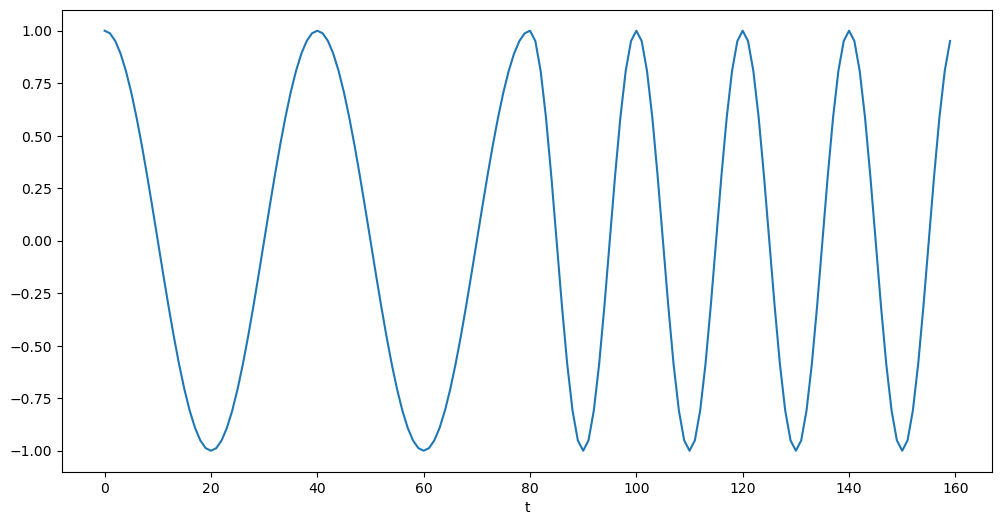

In [7]:
# Not sure how to implement a non-linear ODE with sympy
# Lets just generate the data manually

T = 40 #  period
omega = (2*np.pi/T)
nu = 2*omega
n_samples = 160
tast = n_samples/2 
t = np.arange(n_samples)
phi = (omega-nu)*tast 
k = int(np.floor(tast))
y = np.concatenate((np.cos(omega*t[:k]), np.cos(nu*t[k:]+phi)))
s = pd.Series(y, index=t, name='y')
s.index.name = 't'

s.plot(figsize=(12,6))

if  save_data:
    s.to_csv(os.path.join(data_folder, '4_sinFCP.csv'), header=True)
    print('Data saved at %s' % os.path.join(data_folder, '4_sinFCP.csv'))

# Larger time series

Mean: 0.000000
Mean: 0.000000


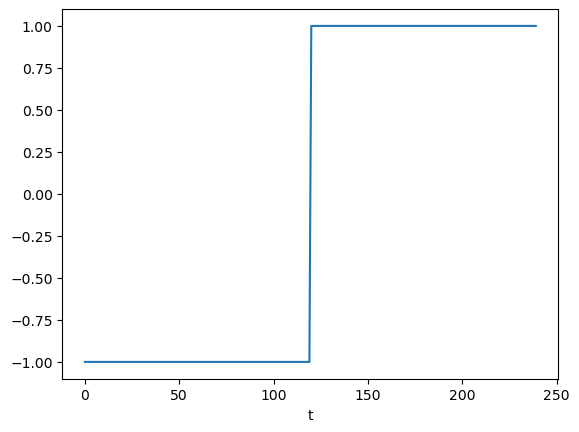

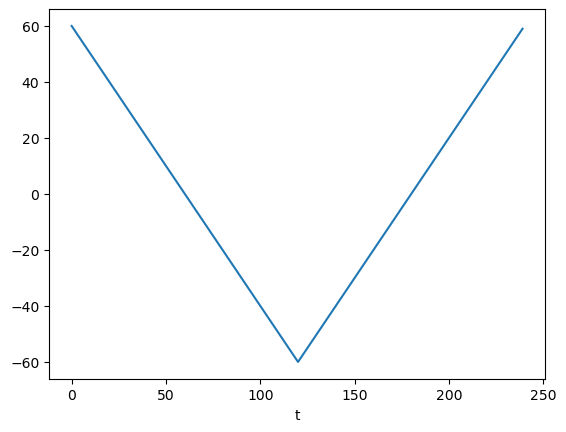

In [8]:
# I already showed the ODE generation. I will now just generate the time series manually

# step
n_samples = 240
tast = 120
y = np.concatenate((-np.ones(tast), np.ones(n_samples-tast)))
s = pd.Series(y, name='y')
s.index.name = 't'
s.plot()
print('Mean: %f' % s.mean())

if  save_data:
    s.to_csv(os.path.join(data_folder, '5_step_large.csv'), header=True)
    print('Data saved at %s' % os.path.join(data_folder, '5_step_large.csv'))

# ramp
n_samples = 240
tast = 120
t = np.arange(n_samples)
y1 = 60.0 - t[:tast]
y2 = -180.0 + t[tast:]
y = np.concatenate((y1, y2))
s = pd.Series(y, name='y')
s.index.name = 't'
plt.figure()
s.plot()
print('Mean: %f' % s.mean())

if  save_data:
    s.to_csv(os.path.join(data_folder, '6_ramp_large.csv'), header=True)
    print('Data saved at %s' % os.path.join(data_folder, '6_ramp_large.csv'))

# Bottom